## EDA - Dataset 01 - avocado_prices

### 1. Packages & Settings


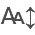

In [11]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Advanced analysis
from scipy import stats
from ydata_profiling import ProfileReport

# Interactive tables (optional)
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Configuration
pd.set_option('display.max_columns', 30)
sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format = 'retina'
np.random.seed(42)  # Reproducibility

### 2. Importing Data

In [12]:
# Data Loading
df = pd.read_csv(r"E:\Work\DataSciencePortfolio\0_Data\0.1_Raw\0.1.01_avocado_prices\avocado.csv")

### 3.1 First Look

In [13]:
# Sample data
show(df.sample(5))  # Random rows to avoid bias

# Summary of the DataFrame
df.info()

# Basic Statistics of the DataFrame
df.describe()

Rows: 18249, Columns: 14


Data Type
Unnamed: 0       int64
Date            object
AveragePrice   float64
Total Volume   float64
4046           float64
4225           float64
4770           float64
Total Bags     float64
Small Bags     float64
Large Bags     float64
XLarge Bags    float64
type            object
year             int64
region          object

Missing Values  % Missing
Unnamed: 0                 0        0.0
Date                       0        0.0
AveragePrice               0        0.0
Total Volume               0        0.0
4046                       0        0.0
4225                       0        0.0
4770                       0        0.0
Total Bags                 0        0.0
Small Bags                 0        0.0
Large Bags                 0        0.0
XLarge Bags                0        0.0
type                       0        0.0
year                       0        0.0
region                     0        0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

### 3.2 Results of First Look:
##### Observations:
- medium sized dataframe (18249 x 14)
- There are no missing values, which is good. No cleaning of null/faulty values necessary.
- Data types outside of "Date" look good, no correction of data types necessary.
##### Potential Problems:
- "unnamed 0" seems like a potentially irrelevant column, at least it's not a key, and the meaning of it isn't clear.
- "Date" is in text/string format, but correctly in YYYY-MM-DD, which makes transforming the column easy.
- There seems to be extremely high standard deviations / abnormalities in "Total Volume" "4046" "4225" "4770" "Total Bags" "Small Bags" "Large Bags" "XLarge Bags"
- These abnormalities do not exist in Average Price, Year, or Unnamed column, which leads to it being tied to a "volume"/"amount" problem. To be observed.

### 4.1 Automated Analysis with ydata_profiling

In [14]:
profile = ProfileReport(df, title="Automated EDA", explorative=True)
profile.to_notebook_iframe()
# Save to HTML for later review (optional)
# profile.to_file("5.1.1b_automated_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 288.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Automated EDA Results
##### Observations
- As shown in 3.2 confirmed, there are abnormal values tied to volumes, with extreme outliers. **(Abnormality)**
- There is a negative correlation between average price and purchase volumes, which makes sense.
- Unnamed column might just be grouping the data in indexes when the data was gathered. **Check with "Date"**.
- Taking a closer look at regions, there are regions such as "east" "west", which might be grouping values of other regions, creating large volumes. **Try to fix**

##### Hypotheses:
- There is a correlation between which type (organic or not) of avocado gets bought and average price, probably organic = more expensive. **Investigate this**
- There seems to be a higher correlation between the medium and large avocados. There also seems a larger correlation for smaller bags, maybe they're preferred.
- XLarge bags and the largest avocado (4770) seem to be less desirable than the smaller options, with large % of zero values. Check if this is seasonal/regional.

### 5. Necessary Cleaning & Transformation Steps for Python Scripts
##### Cleaning:
- Fix "Date" Data type.
- Remove "Unnamed 0" column.
##### Transformation:
- Regional Data cleaning, remove "totals" or combinations of regions, difficult to split up.

### 6. Hypothesis-Driven Analysis

In [15]:
# Check hypotheses in 4.2

### 7. Focused Investigation
*When to use*:  
- Drill into subgroups (e.g., "Why do users aged 30-40 have higher churn?")  
- Export specific slices for stakeholder reviews  
*Industry Standard*: Never explore blindly – start with hypotheses from Sections 4-5.

In [16]:
# Check how hyptheses from 3-5 can be explained by the data
"""
show(
    df.query("Income > 70000"),
    column_filters="footer",
    buttons=["copy", "csv"],
    scrollY="300px",
    classes="compact"
)
"""

'\nshow(\n    df.query("Income > 70000"),\n    column_filters="footer",\n    buttons=["copy", "csv"],\n    scrollY="300px",\n    classes="compact"\n)\n'